<a href="https://colab.research.google.com/github/Ragavendhra-Ramanan/Time-Series-Analysis/blob/master/Multi_factors_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Name:M.R.Ragavendhra Ramnanan**

#**Multi Factors Model**

**Task Overview**

* The idea behind
these models is to explain the **excess returns (over the risk-free rate) of a certain portfolio or
asset using one or more factors**(features). 
* These risk factors can be considered a tool for
understanding the cross-section of (expected) returns.
* In general, factor models can be used to identify interesting assets that can be added to the
investment portfolio, which— in turn—should lead to **better performing portfolios**.

* Implementing the **CAPM** in Python
* Implementing the **Fama-French three-factor model** in Python
* Implementing the **rolling three-factor model on a portfolio of assets**
* Implementing the **four- and five-factor models** in Python

#**Import Relevant Libraries**




In [4]:
%matplotlib inline#plot is visible in notebook beneath the cell also plot can be found when converted to another format such as pdf
%config InlineBackend.figure_format = 'retina'#display with retina resolution to malke figures look better

UsageError: unrecognized arguments: is visible in notebook beneath the cell also plot can be found when converted to another format such as pdf


In [5]:
import matplotlib.pyplot as plt#Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
import warnings#Warning messages are typically issued in situations where it is useful to alert the user of some condition in a program
plt.style.use('seaborn')#use the style of seaborn
plt.rcParams['figure.figsize'] = [8, 4.5]#figure size
plt.rcParams['figure.dpi'] = 300#display resolution of the plot 
warnings.simplefilter(action='ignore', category=FutureWarning)#fix future warnings

# **Implementing the CAPM in Python**

* We will  learn how to estimate the famous **Capital Asset Pricing Model (CAPM)**
and obtain the beta coefficient.
*  This model represents the relationship between the expected
return on a risky asset and the market risk (also known as systematic or undiversifiable
risk). 

* CAPM can be considered a one-factor model, on top of which more complex factor
models were built.

* We consider the case of **Amazon** and assume that the **S&P 500 index**
represents the market. We use 5 years (2014-2018) of monthly data to estimate the beta. In
current

In [9]:
import pandas as pd# pandas is a software library written for the Python programming language for data manipulation and analysis.
import yfinance as yf#YFinance not only downloads the Stock Price data, it also allows us to download all the financial data of a Company since its listing in the stock market
import statsmodels.api as sm#statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration

2. Specify the risky asset and the time horizon:

In [10]:
RISKY_ASSET = 'AMZN'#amazon asset
MARKET_BENCHMARK = '^GSPC'#s&p 500 as benchmark
START_DATE = '2014-01-01'#start date
END_DATE = '2018-12-31'#end date

3. Download data from Yahoo Finance:

In [11]:
#download amazon and s&p 500 datasets
df = yf.download([RISKY_ASSET, MARKET_BENCHMARK],
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True,
                 progress=False)

In [12]:
#print shape
print(f'Downloaded {df.shape[0]} rows of data.')

Downloaded 1257 rows of data.


4. Resample to monthly data and calculate simple returns:

In [13]:
#print first 5 rows
df.head()

Adj Close               ...   Volume            
                  AMZN        ^GSPC  ...     AMZN       ^GSPC
Date                                 ...                     
2014-01-02  397.970001  1831.979980  ...  2137800  3080600000
2014-01-03  396.440002  1831.369995  ...  2210200  2774270000
2014-01-06  393.630005  1826.770020  ...  3170600  3294850000
2014-01-07  398.029999  1837.880005  ...  1916000  3511750000
2014-01-08  401.920013  1837.489990  ...  2316500  3652140000

[5 rows x 12 columns]

In [14]:
#rename the columns of adjusted close
X = df['Adj Close'].rename(columns={RISKY_ASSET: 'asset', MARKET_BENCHMARK: 'market'})
#print 5 first rows
X.head()

,asset,market
Date,,
2014-01-02,397.970001,1831.979980
2014-01-03,396.440002,1831.369995
2014-01-06,393.630005,1826.770020
2014-01-07,398.029999,1837.880005
2014-01-08,401.920013,1837.489990


In [15]:
X=X.resample('M').last().pct_change() .dropna()#convert to monthly frequency and calculate percent change

In [16]:
X.head()#print first 5 rows

,asset,market
Date,,
2014-02-28,0.009507,0.043117
2014-03-31,-0.071058,0.006932
2014-04-30,-0.095847,0.006201
2014-05-31,0.027685,0.021030
2014-06-30,0.039130,0.019058


5. Calculate beta using the covariance approach: 

In [17]:
covariance = X.cov().iloc[0,1]#calculate asset  and market returns covariance
benchmark_variance = X.market.var()#calculate market variance
beta = covariance / benchmark_variance#calcualte beta
beta#print beta

1.6296083359501388

* Beta can be interpreted as the **level of the asset return's sensitivity**, as compared to the
market in general.

6. Prepare the input and estimate CAPM as a linear regression:

**Regression Plot**
* Asset is target.
* Market is feature.

In [ ]:
# separate target
y = X.pop('asset')

# add constant
X = sm.add_constant(X)

# define and fit the regression model 
capm_model = sm.OLS(y, X).fit()

# print results 
print(capm_model.summary())

* These results indicate that the beta (denoted as market here) is equal to **1.62**,
which means that **Amazon's returns are 62% more volatile than the market**
(proxied by S&P 500). 
* The value of the intercept is relatively small and
statistically insignificant at the 5% significance level.

**Risk Free rates**

* In the main example, we assumed there was **no risk-free rate** which is a reasonable
assumption to make nowadays.
*  However, there might be cases when we would like to
account for a non-zero risk-free rate

#### Risk-free rate (13 Week Treasury Bill)

* Approximate the risk-free rate with, for example, the **13
Week (3-month) Treasury Bill** (Yahoo finance ticker: ^IRX ).

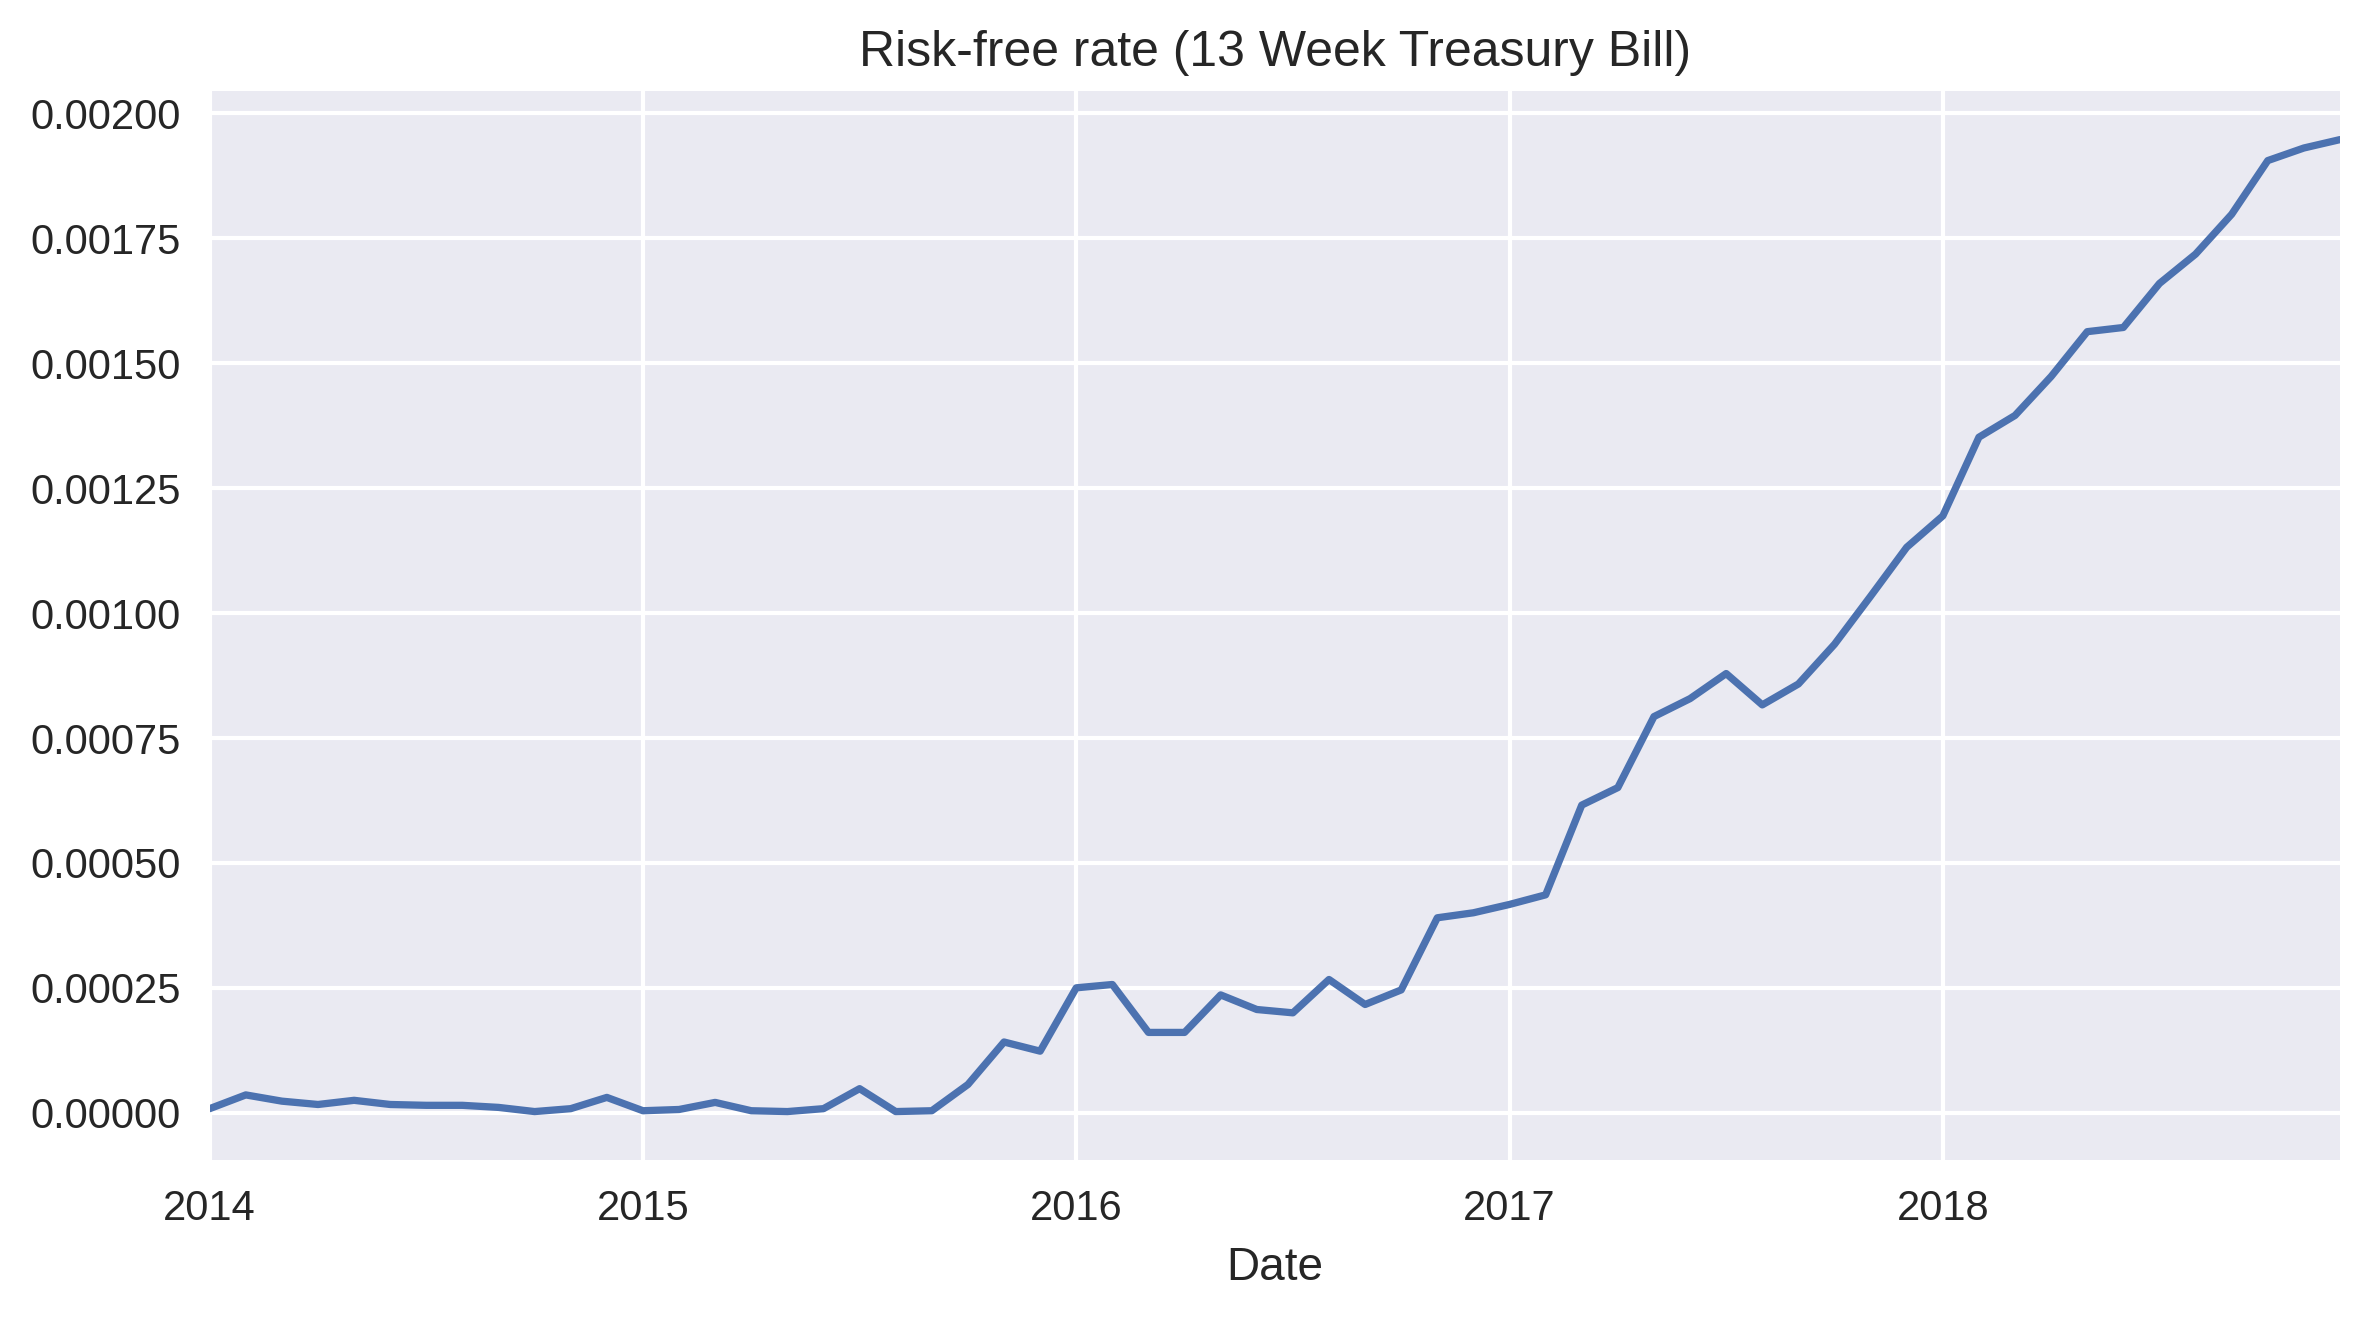

In [19]:
# period lenght in days
N_DAYS = 90

# download data from Yahoo finance
df_rf = yf.download('^IRX',
                    start=START_DATE,
                    end=END_DATE,
                    progress=False)

# resample to monthly by taking last value from each month
rf = df_rf.resample('M').last().Close / 100

# calculate the corresponding daily risk-free return  
rf = ( 1 / (1 - rf * N_DAYS / 360) )**(1 / N_DAYS)  

# convert to monthly and subtract 1
rf = (rf ** 30) - 1 

# plot the risk-free rate
rf.plot(title='Risk-free rate (13 Week Treasury Bill)')

plt.tight_layout()
# plt.savefig('images/ch4_im2.png')
plt.show()

* The another approach is to approximate the risk-free rate using the **3-Month Treasury
Bill (Secondary Market Rate)**, which can be downloaded from the Federal
Reserve Economic Data (FRED) database.

#### Risk-free rate (3-Month Treasury Bill)

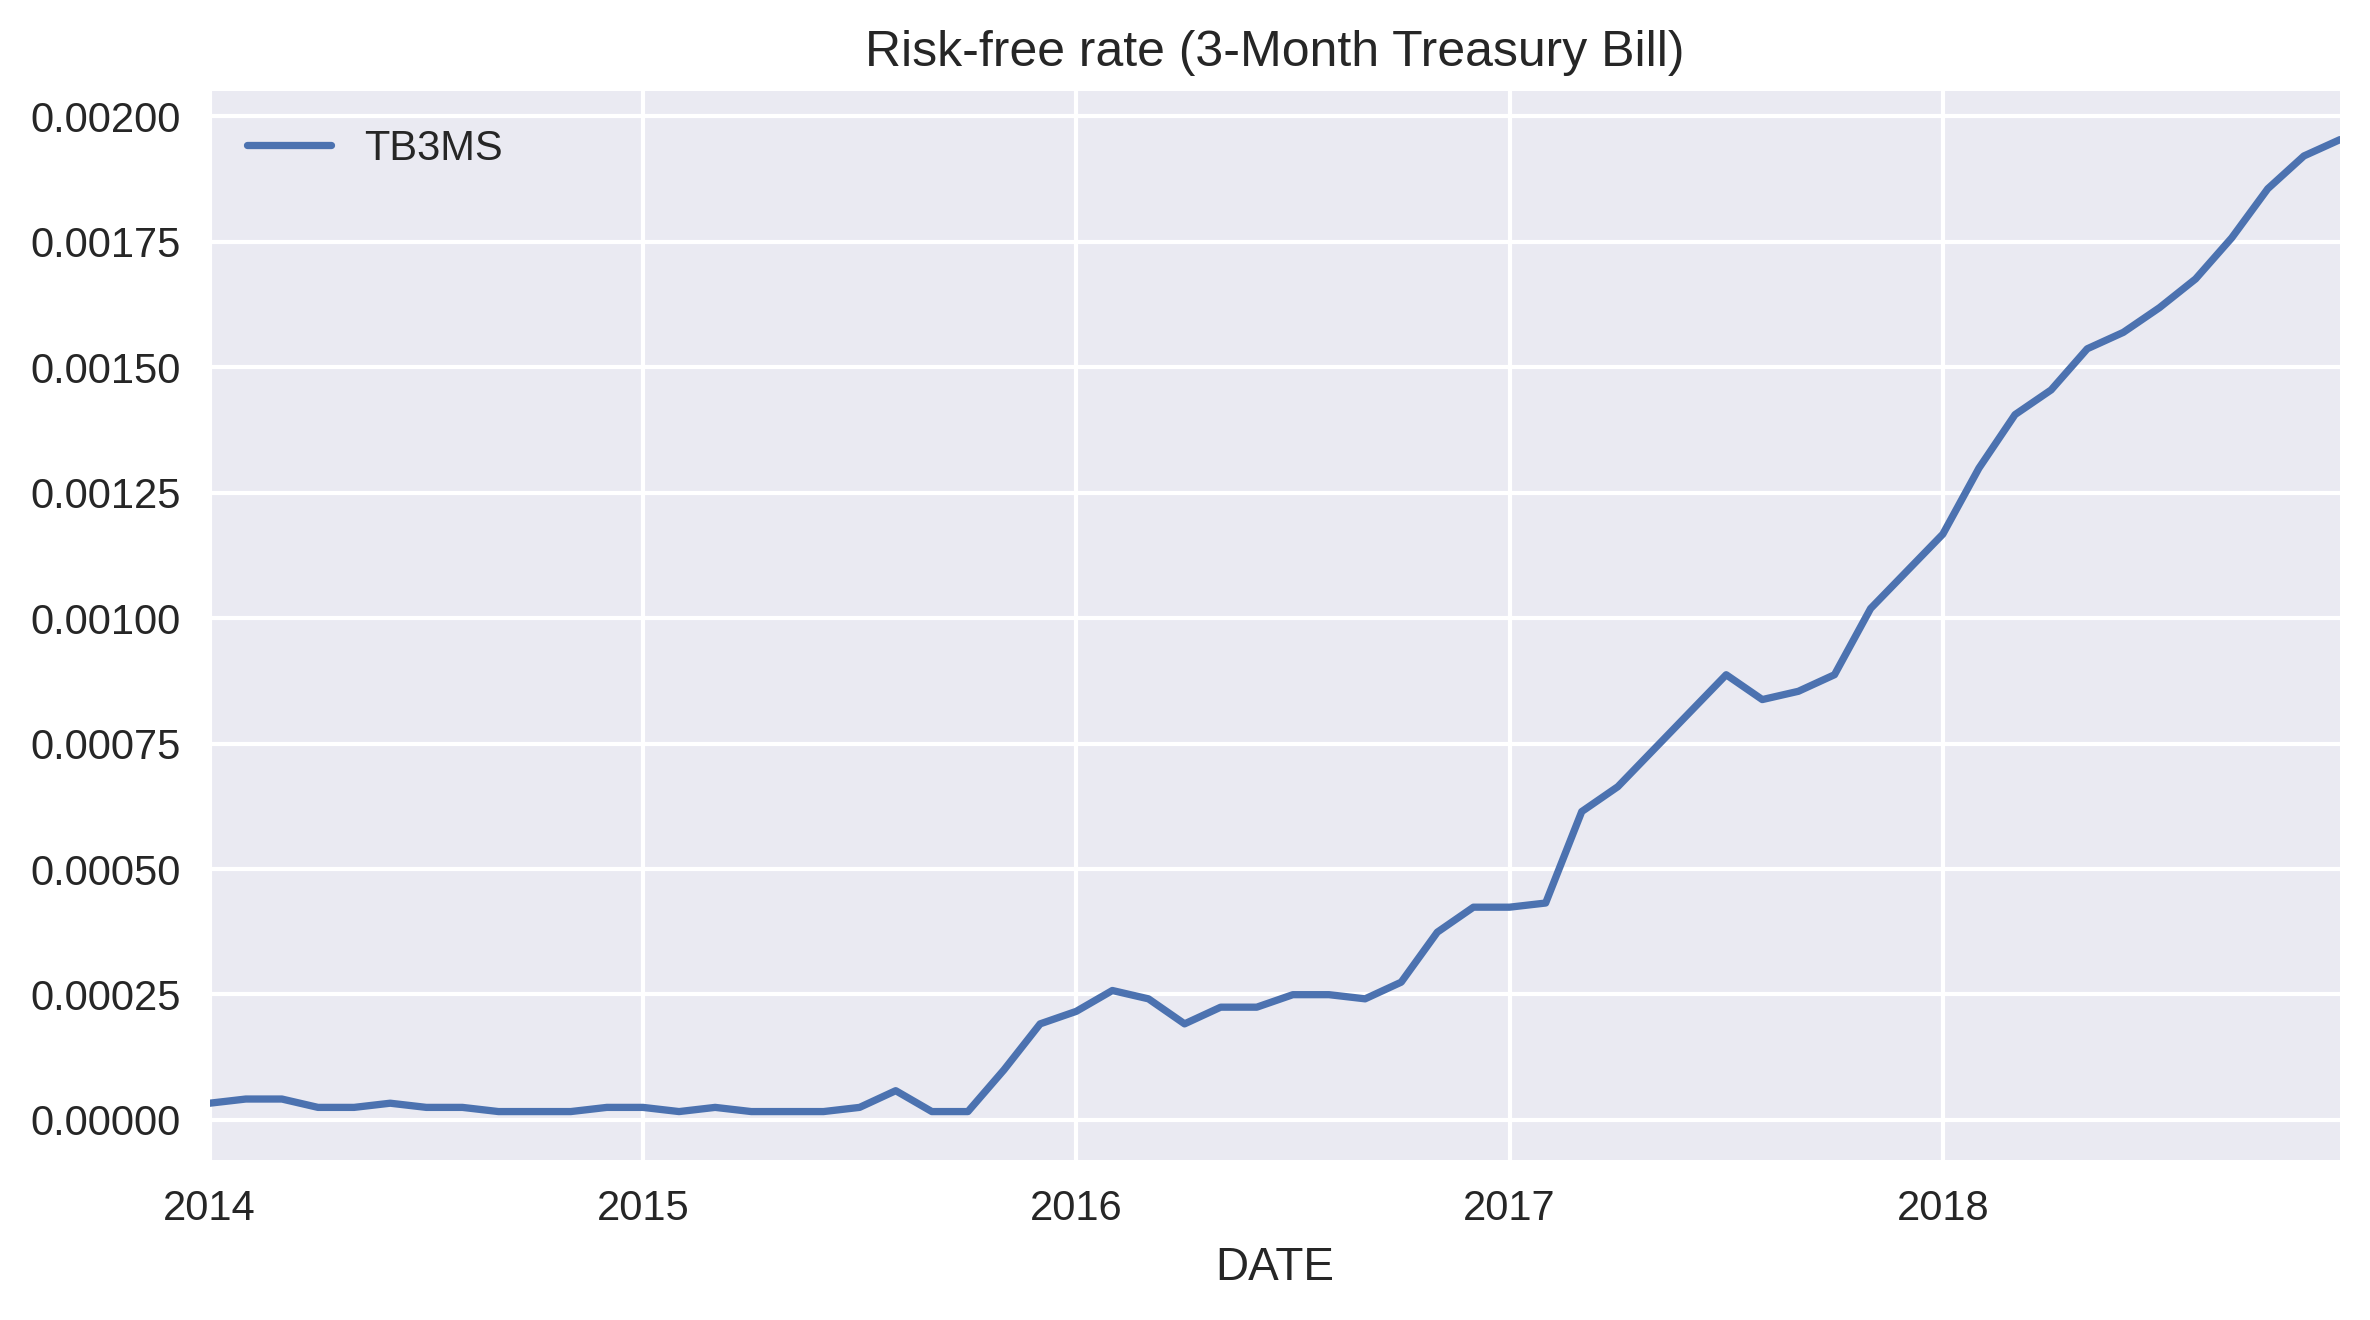

In [20]:
import pandas_datareader.data as web#used to read  data from web

# download the data 
rf = web.DataReader('TB3MS', 'fred', start=START_DATE, end=END_DATE)

# convert to monthly
rf = (1 + (rf / 100)) ** (1 / 12) - 1

# plot the risk-free rate
rf.plot(title='Risk-free rate (3-Month Treasury Bill)')

plt.tight_layout()
# plt.savefig('images/ch4_im3.png')
plt.show()

# **Implementing the Fama-French three-factor model in Python**

1. Import the libraries:

* Fama and French expanded the CAPM model by adding two
additional factors explaining the excess returns of an asset or portfolio. 
* The factors they
considered are:
* **The market factor (MKT)**: It measures the excess return of the market, analogical
to the one in the CAPM.
* **The size factor, SMB**(Small Minus Big): It measures the excess return of stocks
with a small market cap over those with a large market cap.
* **The value factor, HML** (High Minus Low): It measures the excess return of
value stocks over growth stocks. Value stocks have a high book-to-market ratio,
while the growth stocks are characterized by a low ratio.

**Here**, we estimate the **three-factor model** using 5 years (2014-2018) of monthly
returns on Facebook.

In [21]:
#Get data for the given name from the Fama/French data library
from pandas_datareader.famafrench import get_available_datasets
#Up to date remote data access for pandas, works for multiple versions of pandas.
import pandas_datareader.data as web

2. Print available datasets (here only first 5):

In [22]:
#print first 5 datasets
get_available_datasets()[:5]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily']

3. Download the selected dataset:

In [23]:
#download the dataset
ff_dict = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                         start='2014-01-01')

* The default behavior of web.DataReader downloads the **last 5 years'** worth of
data. 
* The resulting object is a dictionary and we can inspect its contents by
running the following command:

In [24]:
ff_dict.keys()#inspect dictionary

dict_keys([0, 1, 'DESCR'])

4. Inspect the description of the dataset

In [25]:
print(ff_dict['DESCR'])#print the description

F-F Research Data Factors
-------------------------

This file was created by CMPT_ME_BEME_RETS using the 202008 CRSP database. The 1-month TBill return is from Ibbotson and Associates, Inc. Copyright 2020 Kenneth R. French

  0 : (80 rows x 4 cols)
  1 : Annual Factors: January-December (6 rows x 4 cols)


5. View the monthly dataset:

In [26]:
ff_dict[0].head()#print first 5 rows

,Mkt-RF,SMB,HML,RF
Date,,,,
2014-01,-3.32,0.88,-2.02,0.0
2014-02,4.65,0.33,-0.37,0.0
2014-03,0.43,-1.90,4.91,0.0
2014-04,-0.19,-4.23,1.11,0.0
2014-05,2.06,-1.90,-0.12,0.0


# **Implementing the rolling three-factor model on a portfolio of assets**

* We learn how to estimate the **three-factor model in a rolling fashion.**
* What we
mean by rolling is that we always consider an estimation window of a constant size (60
months, in this case) and roll it through the entire dataset, one period at a time.
*  A potential
reason for doing such an experiment is to test the stability of the results.

* We use **portfolio returns** instead of a single
asset.
* To keep things simple, we assume that our allocation strategy is to have an equal
share of the total portfolio's value in each of the following stocks: Amazon, Google, Apple,
and Microsoft.
* For this experiment, we use stock prices from the years 2010-2018.

1. Import the libraries:

In [27]:
#statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator.
import statsmodels.formula.api as smf#

2. Define the parameters:

In [28]:
ASSETS = ['AMZN', 'GOOG', 'AAPL', 'MSFT']#assets in portfolio
WEIGHTS = [0.25, 0.25, 0.25, 0.25]#weights
START_DATE = '2009-12-31'#start date
END_DATE = '2018-12-31'#end date

3. Download the factor related data:

In [29]:
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]#download the fama-French Three factors

In [30]:
df_three_factor.head()#print the first 5 rows

,Mkt-RF,SMB,HML,RF
Date,,,,
2009-12,2.75,6.12,-0.11,0.01
2010-01,-3.36,0.38,0.29,0.00
2010-02,3.40,1.19,3.18,0.00
2010-03,6.31,1.43,2.16,0.01
2010-04,2.00,4.87,2.93,0.01


In [31]:
df_three_factor = df_three_factor.div(100)#divide by 100

In [33]:
df_three_factor.head()#print first 5 rows

,Mkt-RF,SMB,HML,RF
Date,,,,
2009-12,0.0275,0.0612,-0.0011,0.0001
2010-01,-0.0336,0.0038,0.0029,0.0000
2010-02,0.0340,0.0119,0.0318,0.0000
2010-03,0.0631,0.0143,0.0216,0.0001
2010-04,0.0200,0.0487,0.0293,0.0001


In [34]:
df_three_factor.index = df_three_factor.index.format()#format the index 

In [35]:
df_three_factor.head()#print first 5 rows

,Mkt-RF,SMB,HML,RF
2009-12,0.0275,0.0612,-0.0011,0.0001
2010-01,-0.0336,0.0038,0.0029,0.0000
2010-02,0.0340,0.0119,0.0318,0.0000
2010-03,0.0631,0.0143,0.0216,0.0001
2010-04,0.0200,0.0487,0.0293,0.0001


4. Download the prices of risky assets from Yahoo Finance:

In [36]:
asset_df = yf.download(ASSETS,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)#download the assets from yahoo finance

print(f'Downloaded {asset_df.shape[0]} rows of data.')#print total rows

Downloaded 2264 rows of data.


5. Calculate the monthly returns on the risky assets:

In [37]:
asset_df = asset_df['Adj Close'].resample('M').last().pct_change().dropna()#calculate monthly returns
# reformat index for joining
asset_df.index = asset_df.index.strftime('%Y-%m')

6. Calculate the portfolio returns:

In [38]:
import numpy as np#used for mathematical operations

In [39]:
asset_df['portfolio_returns'] = np.matmul(asset_df[ASSETS].values, 
                                          WEIGHTS)#multiply assets values with its weights
asset_df.head()#print first 5 rows

,AAPL,AMZN,GOOG,MSFT,portfolio_returns
Date,,,,,
2010-01,-0.088597,-0.067722,-0.145231,-0.075459,-0.094252
2010-02,0.065396,-0.055897,-0.005925,0.022146,0.006430
2010-03,0.148470,0.146706,0.076538,0.021625,0.098335
2010-04,0.111022,0.009796,-0.073036,0.042677,0.022615
2010-05,-0.016125,-0.084902,-0.076222,-0.151394,-0.082161


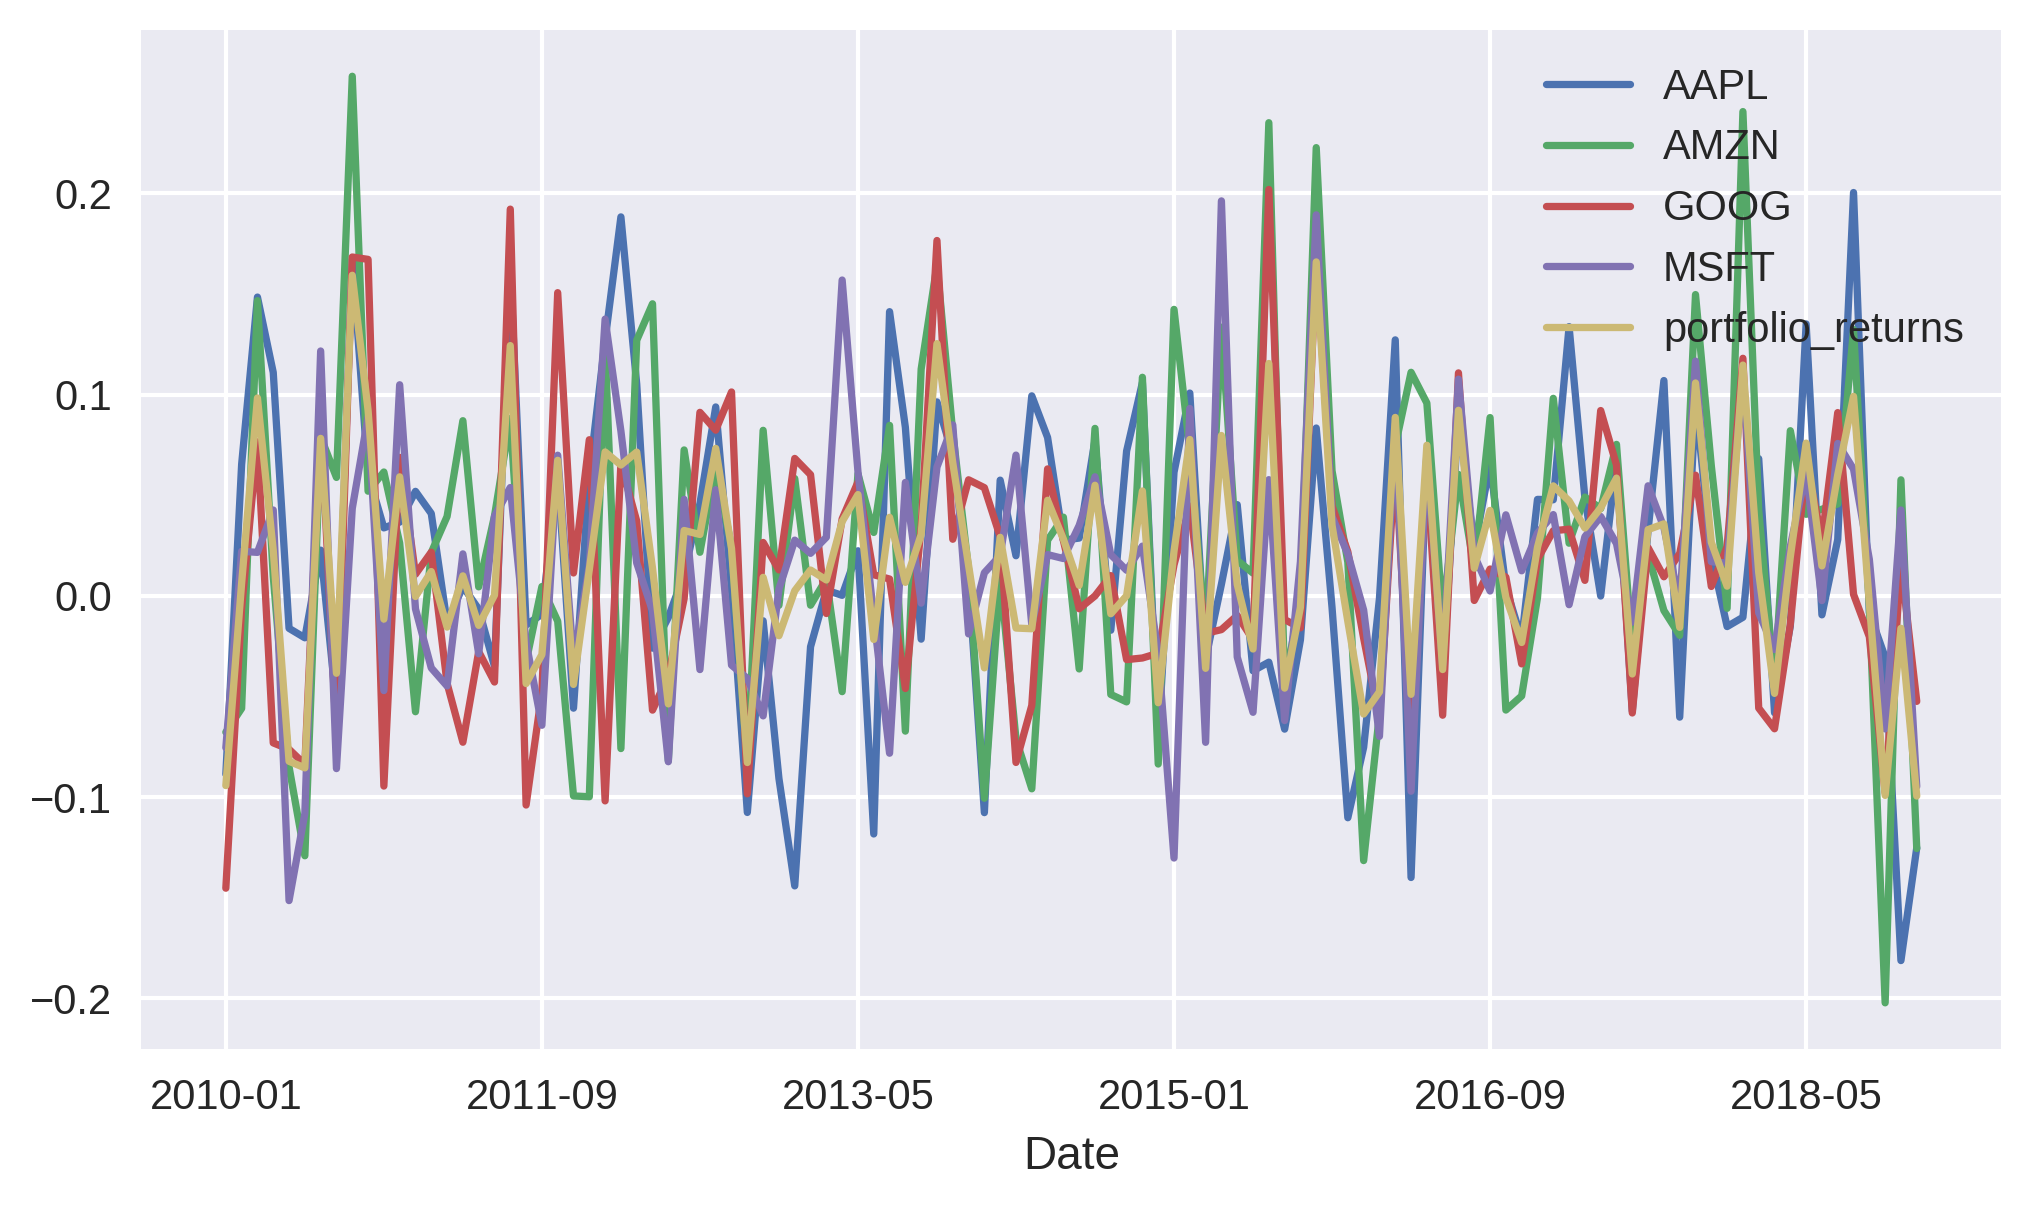

In [ ]:
asset_df.plot()#plot the asset dataframe

7. Merge the datasets:

In [40]:
ff_data = asset_df.join(df_three_factor).drop(ASSETS, axis=1)#merge the datasets dropping the assets
ff_data.columns = ['portf_rtn', 'mkt', 'smb', 'hml', 'rf']#name the columns
ff_data['portf_ex_rtn'] = ff_data.portf_rtn - ff_data.rf#expected return

In [41]:
ff_data.head()#print first 5 rows

,portf_rtn,mkt,smb,hml,rf,portf_ex_rtn
Date,,,,,,
2010-01,-0.094252,-0.0336,0.0038,0.0029,0.0000,-0.094252
2010-02,0.006430,0.0340,0.0119,0.0318,0.0000,0.006430
2010-03,0.098335,0.0631,0.0143,0.0216,0.0001,0.098235
2010-04,0.022615,0.0200,0.0487,0.0293,0.0001,0.022515
2010-05,-0.082161,-0.0789,0.0015,-0.0240,0.0001,-0.082261


8. Define a function for the rolling n-factor model

In [42]:
def rolling_factor_model(input_data, formula, window_size):
    '''
    Function for estimating the Fama-French (n-factor) model using a rolling window of fixed size.
    
    Parameters
    ------------
    input_data : pd.DataFrame
        A DataFrame containing the factors and asset/portfolio returns
    formula : str
        `statsmodels` compatible formula representing the OLS regression  
    window_size : int
        Rolling window length.
    
    Returns
    -----------
    coeffs_df : pd.DataFrame
        DataFrame containing the intercept and the three factors for each iteration.
    '''

    coeffs = []#empty lists

    for start_index in range(len(input_data) - window_size + 1):   #loop over data     
        end_index = start_index + window_size#create end index

        # define and fit the regression model 
        ff_model = smf.ols(
            formula=formula, 
            data=input_data[start_index:end_index]
        ).fit()
   
        # store coefficients
        coeffs.append(ff_model.params)
    #create dataframes
    coeffs_df = pd.DataFrame(
        coeffs, 
        index=input_data.index[window_size - 1:]
    )

    return coeffs_df

9. Estimate the rolling three-factor model and plot the results:

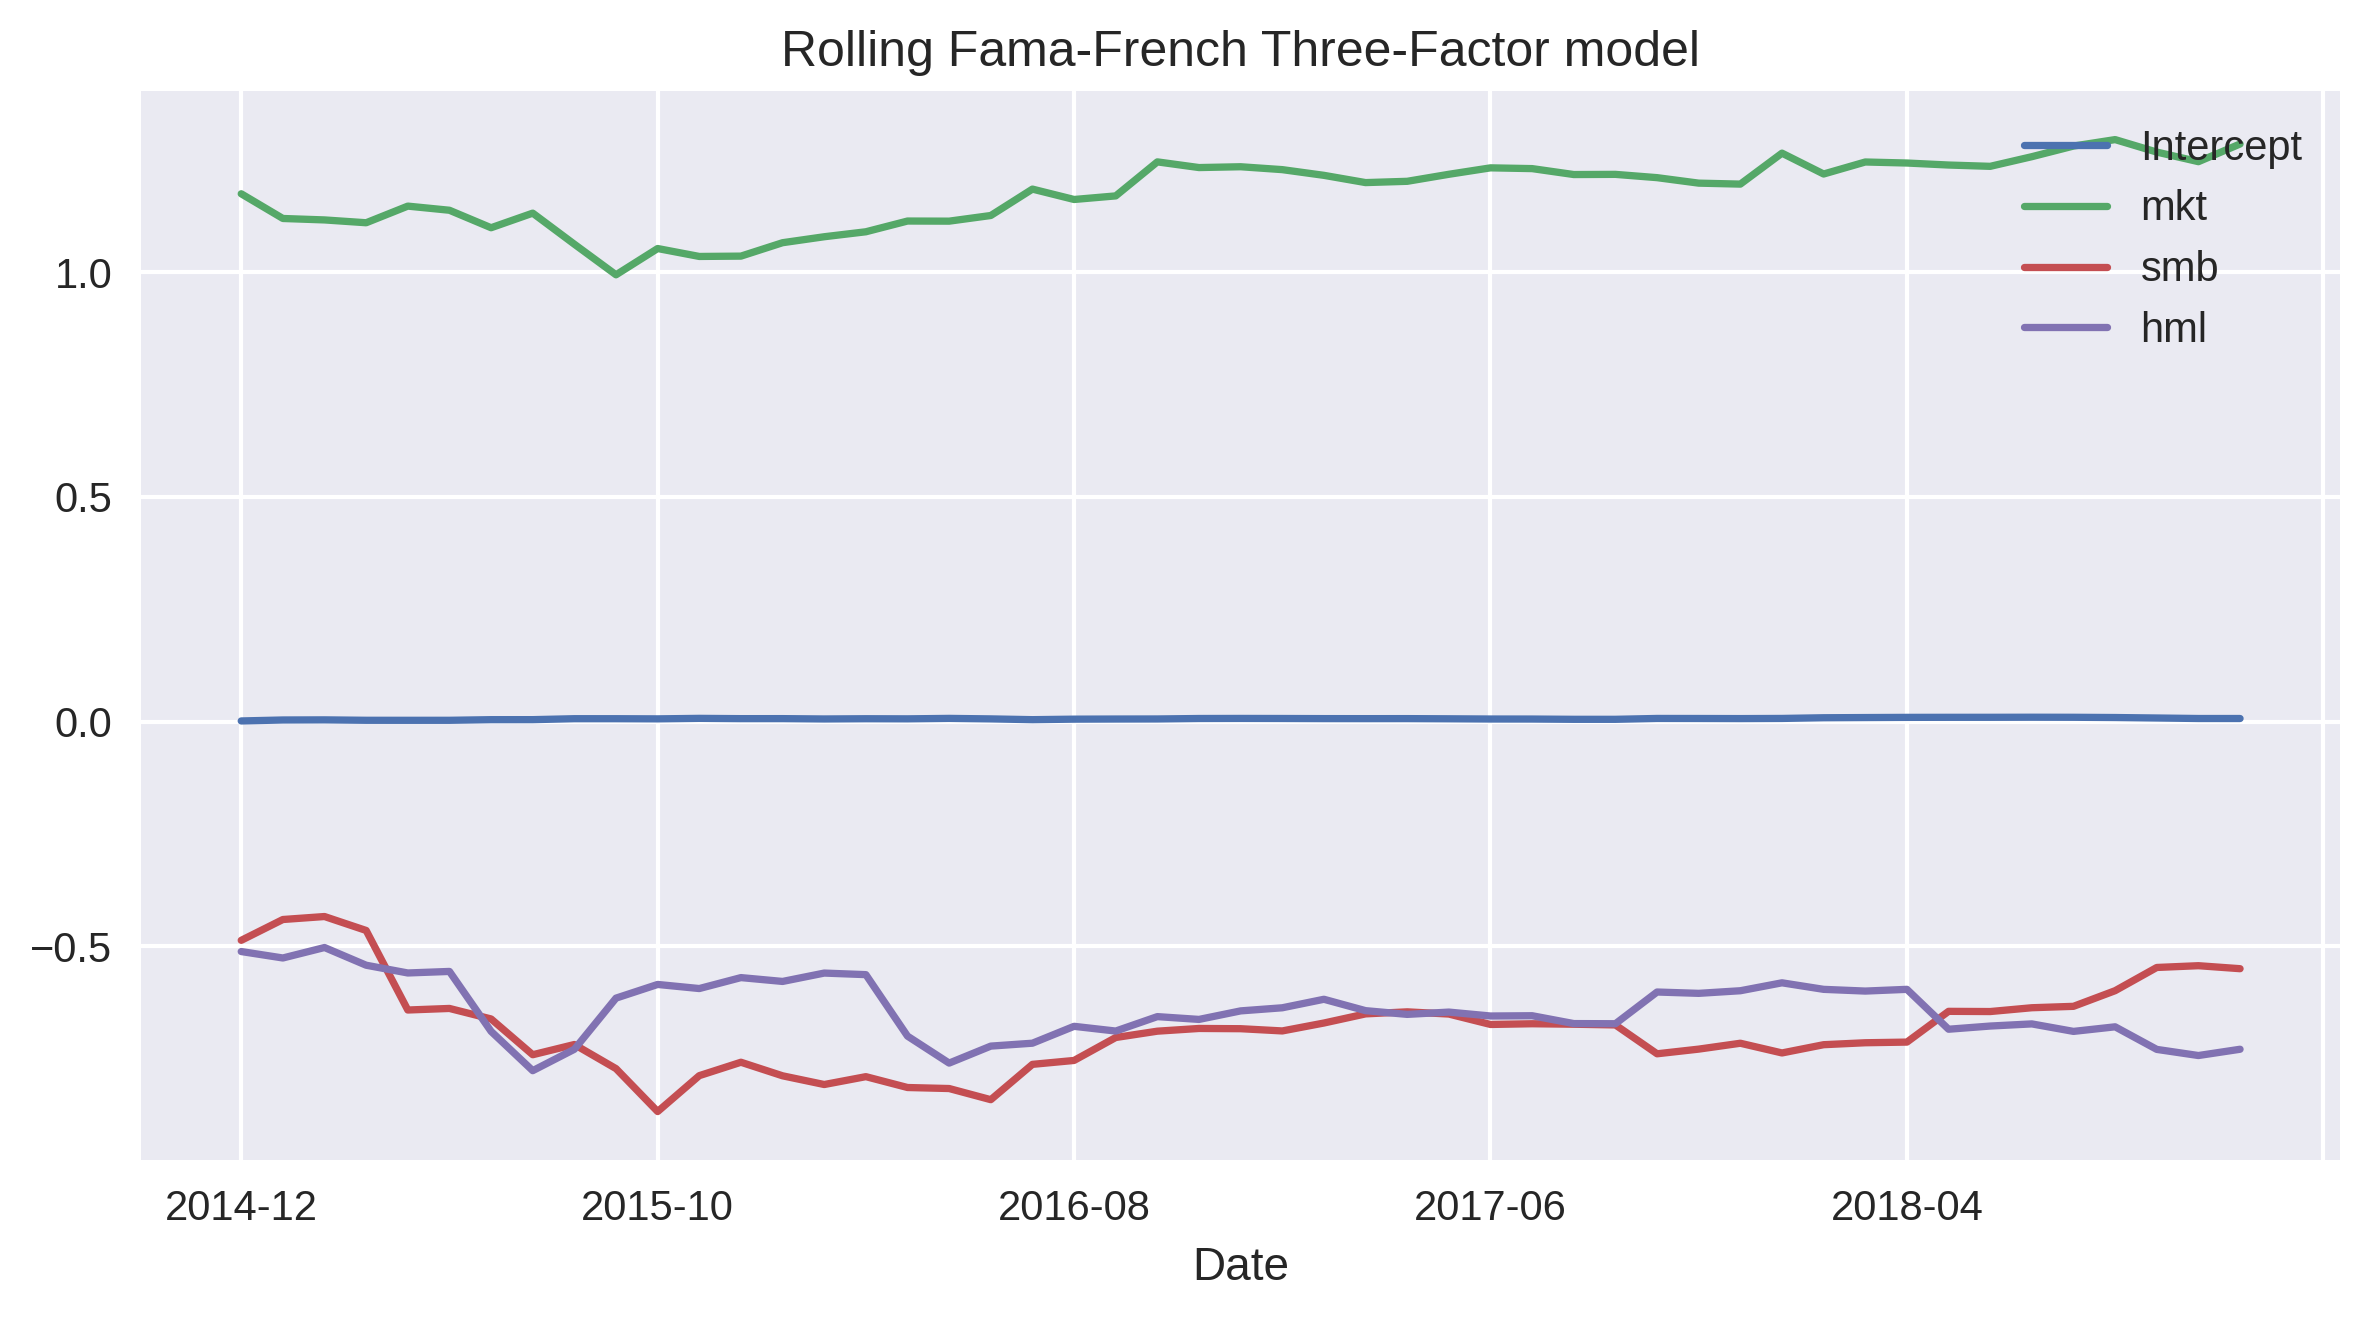

In [43]:
MODEL_FORMULA = 'portf_ex_rtn ~ mkt + smb + hml'#model formula
results_df = rolling_factor_model(ff_data, 
                                  MODEL_FORMULA, 
                                  window_size=60)#create dataframe
results_df.plot(title = 'Rolling Fama-French Three-Factor model')#plot

plt.tight_layout()
# plt.savefig('images/ch4_im8.png')
plt.show()

In [44]:
results_df.head()#print first 5 rows

,Intercept,mkt,smb,hml
Date,,,,
2014-12,0.001293,1.174872,-0.487093,-0.512038
2015-01,0.003448,1.119878,-0.440723,-0.526385
2015-02,0.003714,1.116658,-0.434088,-0.503069
2015-03,0.002770,1.110373,-0.465119,-0.542479
2015-04,0.002726,1.147399,-0.642195,-0.559735


* The intercept is almost **constant and very close to 0**
* There is some variability in the factors, but **no sudden reversals or
unexpected jumps**.

# **Implementing the four- and five-factor models in Python**

* **Carhart's Four-Factor model:** The underlying assumption of this extension is that, within a
short period of time, a winner stock will remain a winner, while a loser will remain a loser.
* An example of a criterion for classifying winners and losers could be the last 12-month
cumulative total returns. 
* After identifying the two groups, we long the winners and short
the losers within a certain holding period.
* **The momentum factor** (WML; Winners Minus Losers) measures the excess returns of the
winner stocks over the loser stocks in the past 12 months

1. Specify the risky asset and the time horizon:

In [45]:
RISKY_ASSET = 'AMZN'#name the asset
START_DATE = '2013-12-31'#start date
END_DATE = '2018-12-31'#end date

2. Download the risk factors from prof. French's website:

In [46]:
# three factors 
df_three_factor = web.DataReader('F-F_Research_Data_Factors', 'famafrench', 
                                 start=START_DATE)[0]
df_three_factor.index = df_three_factor.index.format()

# momentum factor
df_mom = web.DataReader('F-F_Momentum_Factor', 'famafrench', 
                        start=START_DATE)[0]
df_mom.index = df_mom.index.format()

# five factors
df_five_factor = web.DataReader('F-F_Research_Data_5_Factors_2x3', 
                                'famafrench', 
                                start=START_DATE)[0]
df_five_factor.index = df_five_factor.index.format()

3. Download the data of the risky asset from Yahoo Finance:

In [47]:
asset_df = yf.download(RISKY_ASSET,
                       start=START_DATE,
                       end=END_DATE,
                       adjusted=True,
                       progress=False)#download the dataset

print(f'Downloaded {asset_df.shape[0]} rows of data.')#print the rows

Downloaded 1258 rows of data.


4. Calculate monthly returns:

In [48]:
y = asset_df['Adj Close'].resample('M').last().pct_change().dropna()#calculate monthly returns

y.index = y.index.strftime('%Y-%m')#convert datetime
y.name = 'return'#column name

5. Merge the datasets for the four-factor models:

In [50]:
# join all datasets on the index
four_factor_data = df_three_factor.join(df_mom).join(y)

# rename columns
four_factor_data.columns = ['mkt', 'smb', 'hml', 'rf', 'mom', 'rtn']

# divide everything (except returns) by 100
four_factor_data.loc[:, four_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
four_factor_data.index = four_factor_data.index.format() 


# select period of interest
four_factor_data = four_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
four_factor_data['excess_rtn'] = four_factor_data.rtn - four_factor_data.rf
#print first 5 rows
four_factor_data.head()

,mkt,smb,hml,rf,mom,rtn,excess_rtn
2014-01,-0.0332,0.0088,-0.0202,0.0,0.0174,-0.100554,-0.100554
2014-02,0.0465,0.0033,-0.0037,0.0,0.0205,0.009507,0.009507
2014-03,0.0043,-0.0190,0.0491,0.0,-0.0339,-0.071058,-0.071058
2014-04,-0.0019,-0.0423,0.0111,0.0,-0.0379,-0.095847,-0.095847
2014-05,0.0206,-0.0190,-0.0012,0.0,0.0121,0.027685,0.027685


6. Merge the datasets for the five-factor models:

In [51]:
# join all datasets on the index
five_factor_data = df_five_factor.join(y)

# rename columns
five_factor_data.columns = ['mkt', 'smb', 'hml', 'rmw', 'cma', 'rf', 'rtn']

# divide everything (except returns) by 100
five_factor_data.loc[:, five_factor_data.columns != 'rtn'] /= 100

# convert index to datetime
five_factor_data.index =five_factor_data.index.format() 
                                        

# select period of interest
five_factor_data = five_factor_data.loc[START_DATE:END_DATE]

# calculate excess returns
five_factor_data['excess_rtn'] = five_factor_data.rtn - five_factor_data.rf
#print first 55 rows
five_factor_data.head()

,mkt,smb,hml,rmw,cma,rf,rtn,excess_rtn
2014-01,-0.0332,0.0058,-0.0202,-0.0393,-0.0136,0.0,-0.100554,-0.100554
2014-02,0.0465,0.0013,-0.0037,-0.0024,-0.0043,0.0,0.009507,0.009507
2014-03,0.0043,-0.0117,0.0491,0.0217,0.0189,0.0,-0.071058,-0.071058
2014-04,-0.0019,-0.0414,0.0111,0.0353,0.0104,0.0,-0.095847,-0.095847
2014-05,0.0206,-0.0191,-0.0012,0.0003,-0.0106,0.0,0.027685,0.027685


7. Estimate the four-factor model:

In [52]:
#OLS model
four_factor_model = smf.ols(formula='excess_rtn ~ mkt + smb + hml + mom', 
                            data=four_factor_data).fit()
#print summary
print(four_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     16.64
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           5.40e-09
Time:                        14:25:33   Log-Likelihood:                 86.115
No. Observations:                  60   AIC:                            -162.2
Df Residuals:                      55   BIC:                            -151.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0093      0.008      1.149      0.2

8. Estimate the five-factor model:

In [53]:
#OLS model
five_factor_model = smf.ols(
    formula='excess_rtn ~ mkt + smb + hml + rmw + cma', 
    data=five_factor_data
).fit()
#print summary
print(five_factor_model.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_rtn   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     15.60
Date:                Sat, 10 Oct 2020   Prob (F-statistic):           1.75e-09
Time:                        14:25:47   Log-Likelihood:                 89.138
No. Observations:                  60   AIC:                            -166.3
Df Residuals:                      54   BIC:                            -153.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0099      0.008      1.277      0.2

* According to the **five-factor model**, Amazon's excess returns are negatively
exposed to most of the factors (all but the market factor).
* Here, we present an
example of the interpretation of the coefficients: an **increase by 1 percentage** point
in the market factor results in an increase of 0.015 p.p. 
* In other words, for a 1%
return by the market factor, we can expect our portfolio (Amazon's stock) to
return **1.5508 * 1%** in excess of the risk-free rate.
Similarly to the three-factor model, if the five-factor model fully explains the
excess stock returns, the estimated intercept should be statistically
indistinguishable from zero